In [1]:
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd
import time

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

import sklearn

%precision 3

'%.3f'

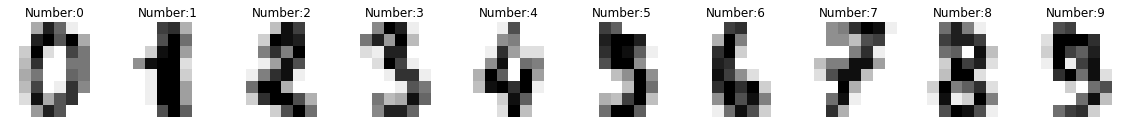

In [2]:
from sklearn.datasets import load_digits

digits = load_digits()

plt.figure(figsize=(20, 5))
for label, img in zip(digits.target[:10], digits.images[:10]):
    plt.subplot(1, 10, label+1)
    plt.axis('off')
    plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Number:{0}'.format(label))

In [3]:
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

In [63]:
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

models = {
    'DecisionTree(gini)': DecisionTreeClassifier(criterion='gini'),
    'LogisticRegression': LogisticRegression(),
    'kNN': KNeighborsClassifier(),
    'LinearSVC': LinearSVC(),
    'SVC': SVC()
}

scores = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores[(model_name, 'precision_score')] = precision_score(y_test, y_pred, average='micro')
    scores[(model_name, 'recall_score')] = recall_score(y_test, y_pred, average='micro')
    scores[(model_name, 'f1_score')] = f1_score(y_test, y_pred, average='micro')
    m = confusion_matrix(y_test, y_pred)
    print(model_name)
    print('Confution matrix:\n{}'.format(m))

pd.Series(scores).unstack()

DecisionTree(gini)
Confution matrix:
[[34  0  0  0  1  2  0  0  0  0]
 [ 0 34  2  2  3  0  0  0  0  2]
 [ 1  3 36  0  1  0  0  0  2  1]
 [ 0  0  4 38  0  0  0  0  2  1]
 [ 1  2  0  0 33  0  0  1  0  1]
 [ 1  0  0  4  0 42  0  0  0  1]
 [ 0  1  0  1  0  0 49  0  1  0]
 [ 1  0  1  3  1  1  0 38  1  2]
 [ 0  1  0  4  0  0  0  0 40  3]
 [ 1  0  2  2  1  3  0  0  1 37]]
LogisticRegression
Confution matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  1 40  3  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 45]]
kNN
Confution matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 42  0  0  0  1  0  0  0  0]
 [ 0  0 43  1  0  0  0  0  0  0]
 [ 0  0  0 45  0  0  0  0  0  0]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  0  0 

C:\Users\kazuy\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kazuy\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC
Confution matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 32  0  0  0  0  2  0  8  1]
 [ 0  1 37  3  0  0  0  0  3  0]
 [ 0  0  0 41  0  0  0  0  1  3]
 [ 0  0  0  1 37  0  0  0  0  0]
 [ 0  0  0  1  0 43  0  0  1  3]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  2  0  0  0  0  0  0 44  2]
 [ 0  0  0  0  0  1  0  0  1 45]]
SVC
Confution matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 43  0  0  0  0  0  0  0  0]
 [ 0  0 44  0  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  1  0]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  0  0  0  0  0  0 48  0  0]
 [ 0  1  0  0  0  0  0  0 47  0]
 [ 0  0  0  0  0  1  0  0  0 46]]


,f1_score,precision_score,recall_score
DecisionTree(gini),0.846667,0.846667,0.846667
LinearSVC,0.917778,0.917778,0.917778
LogisticRegression,0.951111,0.951111,0.951111
SVC,0.991111,0.991111,0.991111
kNN,0.980000,0.980000,0.980000


↓解答のコピペ

In [4]:
# 解答
# データの分割（学習データとテストデータ分ける）
from sklearn.model_selection import train_test_split

# 混同行列
from sklearn.metrics import confusion_matrix

# ロジスティック回帰
from sklearn.linear_model import LogisticRegression
# SVM
from sklearn.svm import LinearSVC
# 決定木
from sklearn.tree import  DecisionTreeClassifier
# k-NN
from sklearn.neighbors import  KNeighborsClassifier
# ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier

# 分析対象データ
from sklearn.datasets import load_digits
digits = load_digits()

# 説明変数
X = digits.data
# 目的変数
Y = digits.target

# 学習データとテストデータの分割
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, random_state=0)

In [5]:
# データがアンバランスに分かれていないか確認
# train
print('train:',pd.DataFrame(y_train,columns=['label']).groupby('label')['label'].count())

# test
print('test:',pd.DataFrame(y_test,columns=['label']).groupby('label')['label'].count())

train: label
0    141
1    139
2    133
3    138
4    143
5    134
6    129
7    131
8    126
9    133
Name: label, dtype: int64
test: label
0    37
1    43
2    44
3    45
4    38
5    48
6    52
7    48
8    48
9    47
Name: label, dtype: int64


In [6]:
# それぞれのモデルに対して繰り返し実行して確認する
for model in [LogisticRegression(),LinearSVC(), 
              DecisionTreeClassifier(),
              KNeighborsClassifier(n_neighbors=3),
              RandomForestClassifier()]:
    
    fit_model = model.fit(X_train,y_train)
    pred_y = fit_model.predict(X_test)   
    confusion_m = confusion_matrix(y_test,pred_y)
    print('confusion_matrix:')
    print(confusion_m)
    # __class__.__name__は、そのモデルのクラス名
    print('train:',fit_model.__class__.__name__ ,fit_model.score(X_train,y_train))
    print('test:',fit_model.__class__.__name__ , fit_model.score(X_test,y_test))
    print('===============================================================\n')

C:\Users\kazuy\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\kazuy\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


confusion_matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  1 40  3  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 45]]
train: LogisticRegression 1.0
test: LogisticRegression 0.9511111111111111

confusion_matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  1  0 14  0]
 [ 0  1 37  3  0  0  0  0  3  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  1 37  0  0  0  0  0]
 [ 0  0  0  1  0 44  0  0  2  1]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  2  0  0  0  0  0  0 46  0]
 [ 0  0  0  1  1  1  0  0  4 40]]
train: LinearSVC 0.9710467706013363
test: LinearSVC 0.9088888888888889

confusion_matrix:
[[34  0  0  2  0  0  1  0  0  0]
 [ 0 39  2  1  1  0  0  0  0  0]
 [ 1  0 38  4  0  0  0  0  1  0]
 [ 0  2  4 35  0  0  0  1  1  2]
 [ 2 